# Evas√£o de Clientes Telecom X

In [ ]:
# Import ds bibliotecas
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import requests
import json

In [ ]:
# Estiliza√ß√£o
custom_params = {"axes.spines.right": False, "axes.spines.top": False}

colors = sns.color_palette('deep')
sns.set_theme(style="white", font_scale=1.1, rc=custom_params)
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

# 1. Extra√ß√£o dos Dados

In [ ]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
response = requests.get(url)
data = response.json()
df_churn = pd.json_normalize(data, sep='_')
df_churn.head()

customerID Churn customer_gender  customer_SeniorCitizen customer_Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer_Dependents  customer_tenure phone_PhoneService phone_MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet_InternetService  ... internet_OnlineBackup  \
0                      DSL  ...                   Yes   
1                      DSL  ...                    No   
2              Fiber optic  ...                    No   
3              Fiber optic  ...                   Yes   
4              Fiber optic  ...                    No   

  internet_DeviceProtection internet_TechSupport internet_StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   
3                       Yes                   No                  Yes   
4                        No                  Yes                  Yes   

  internet_StreamingMovies account_Contract account_PaperlessBilling  \
0                       No         One year                      Yes   
1                      Yes   Month-to-month                       No   
2                       No   Month-to-month                      Yes   
3                      Yes   Month-to-month                      Yes   
4                       No   Month-to-month                      Yes   

  account_PaymentMethod account_Charges_Monthly  account_Charges_Total  
0          Mailed check                    65.6                  593.3  
1          Mailed check                    59.9                  542.4  
2      Electronic check                    73.9                 280.85  
3      Electronic check                    98.0                1237.85  
4          Mailed check                    83.9                  267.4  

[5 rows x 21 columns]

# 2. Transforma√ß√£o dos Dados

In [ ]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [ ]:
df_churn = df_churn.map(lambda x: x.strip() if isinstance(x, str) else x)
df_churn = df_churn.replace('', np.nan)


In [ ]:
df_churn.duplicated().sum()

np.int64(0)

In [ ]:
df_churn.isnull().sum()

customerID                     0
Churn                        224
customer_gender                0
customer_SeniorCitizen         0
customer_Partner               0
customer_Dependents            0
customer_tenure                0
phone_PhoneService             0
phone_MultipleLines            0
internet_InternetService       0
internet_OnlineSecurity        0
internet_OnlineBackup          0
internet_DeviceProtection      0
internet_TechSupport           0
internet_StreamingTV           0
internet_StreamingMovies       0
account_Contract               0
account_PaperlessBilling       0
account_PaymentMethod          0
account_Charges_Monthly        0
account_Charges_Total         11
dtype: int64

In [ ]:
# Excluir linhas que tem dados v√°zios
df_churn = df_churn.dropna().copy()

In [ ]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer_gender            7032 non-null   object 
 3   customer_SeniorCitizen     7032 non-null   int64  
 4   customer_Partner           7032 non-null   object 
 5   customer_Dependents        7032 non-null   object 
 6   customer_tenure            7032 non-null   int64  
 7   phone_PhoneService         7032 non-null   object 
 8   phone_MultipleLines        7032 non-null   object 
 9   internet_InternetService   7032 non-null   object 
 10  internet_OnlineSecurity    7032 non-null   object 
 11  internet_OnlineBackup      7032 non-null   object 
 12  internet_DeviceProtection  7032 non-null   object 
 13  internet_TechSupport       7032 non-null   object 
 1

In [ ]:
# Padronizando o nome das colunas
df_churn.columns = df_churn.columns.str.lower().str.replace('customer_', '').str.replace('phone_','').str.replace('internet_', '').str.replace('account_', '')
df_churn['charges_total'] = df_churn['charges_total'].astype(float)

# Criando a coluna de contas diarias
df_churn['charges_daily'] = df_churn['charges_monthly'] / 30


In [ ]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7032 non-null   object 
 1   churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   seniorcitizen     7032 non-null   int64  
 4   partner           7032 non-null   object 
 5   dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   phoneservice      7032 non-null   object 
 8   multiplelines     7032 non-null   object 
 9   internetservice   7032 non-null   object 
 10  onlinesecurity    7032 non-null   object 
 11  onlinebackup      7032 non-null   object 
 12  deviceprotection  7032 non-null   object 
 13  techsupport       7032 non-null   object 
 14  streamingtv       7032 non-null   object 
 15  streamingmovies   7032 non-null   object 
 16  contract          7032 non-null   object 
 17  

In [ ]:
for col in df_churn.columns:
    print(f'{col}:{df_churn[col].unique()}')

customerid:['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
churn:['No' 'Yes']
gender:['Female' 'Male']
seniorcitizen:[0 1]
partner:['Yes' 'No']
dependents:['Yes' 'No']
tenure:[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]
phoneservice:['Yes' 'No']
multiplelines:['No' 'Yes' 'No phone service']
internetservice:['DSL' 'Fiber optic' 'No']
onlinesecurity:['No' 'Yes' 'No internet service']
onlinebackup:['Yes' 'No' 'No internet service']
deviceprotection:['No' 'Yes' 'No internet service']
techsupport:['Yes' 'No' 'No internet service']
streamingtv:['Yes' 'No' 'No internet service']
streamingmovies:['No' 'Yes' 'No internet service']
contract:['One year' 'Month-to-month' 'Two year']
paperlessbilling:['Yes' 'No']
paymentmethod:['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'B

In [ ]:
# Transformando a binariza√ß√£o das colunas
df_churn['churn_bin'] = df_churn['churn'].map({'No': 0, 'Yes': 1})
df_churn['seniorcitizen'] = df_churn['seniorcitizen'].astype(int)
df_churn['seniorcitizen'] = df_churn['seniorcitizen'].map({0: 'No', 1: 'Yes'})


In [ ]:
# Transformando as colunas categoricas
cat_cols = ['gender', 'partner', 'dependents', 'phoneservice', 'multiplelines',
            'internetservice', 'onlinesecurity', 'onlinebackup',
            'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
            'paperlessbilling', 'paymentmethod', 'seniorcitizen']

for col in cat_cols:
    df_churn[col] = df_churn[col].astype('category')


# Transformando as colunas categoricas ordenadas
ordem_contratos = ['Month-to-month', 'One year', 'Two year']
tipo_ordenado = CategoricalDtype(categories=ordem_contratos, ordered=True)

df_churn['contract'] = df_churn['contract'].astype(tipo_ordenado)

In [ ]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerid        7032 non-null   object  
 1   churn             7032 non-null   object  
 2   gender            7032 non-null   category
 3   seniorcitizen     7032 non-null   category
 4   partner           7032 non-null   category
 5   dependents        7032 non-null   category
 6   tenure            7032 non-null   int64   
 7   phoneservice      7032 non-null   category
 8   multiplelines     7032 non-null   category
 9   internetservice   7032 non-null   category
 10  onlinesecurity    7032 non-null   category
 11  onlinebackup      7032 non-null   category
 12  deviceprotection  7032 non-null   category
 13  techsupport       7032 non-null   category
 14  streamingtv       7032 non-null   category
 15  streamingmovies   7032 non-null   category
 16  contract          7032 non-nu

# 2. Analise Descritiva

In [ ]:
df_churn.describe(include='all').T

count unique               top  freq         mean  \
customerid          7032   7032        9995-HOTOH     1          NaN   
churn               7032      2                No  5163          NaN   
gender              7032      2              Male  3549          NaN   
seniorcitizen       7032      2                No  5890          NaN   
partner             7032      2                No  3639          NaN   
dependents          7032      2                No  4933          NaN   
tenure            7032.0    NaN               NaN   NaN    32.421786   
phoneservice        7032      2               Yes  6352          NaN   
multiplelines       7032      3                No  3385          NaN   
internetservice     7032      3       Fiber optic  3096          NaN   
onlinesecurity      7032      3                No  3497          NaN   
onlinebackup        7032      3                No  3087          NaN   
deviceprotection    7032      3                No  3094          NaN   
techsupport         7032      3                No  3472          NaN   
streamingtv         7032      3                No  2809          NaN   
streamingmovies     7032      3                No  2781          NaN   
contract            7032      3    Month-to-month  3875          NaN   
paperlessbilling    7032      2               Yes  4168          NaN   
paymentmethod       7032      4  Electronic check  2365          NaN   
charges_monthly   7032.0    NaN               NaN   NaN    64.798208   
charges_total     7032.0    NaN               NaN   NaN  2283.300441   
charges_daily     7032.0    NaN               NaN   NaN      2.15994   
churn_bin         7032.0    NaN               NaN   NaN     0.265785   

                          std       min      25%       50%        75%  \
customerid                NaN       NaN      NaN       NaN        NaN   
churn                     NaN       NaN      NaN       NaN        NaN   
gender                    NaN       NaN      NaN       NaN        NaN   
seniorcitizen             NaN       NaN      NaN       NaN        NaN   
partner                   NaN       NaN      NaN       NaN        NaN   
dependents                NaN       NaN      NaN       NaN        NaN   
tenure               24.54526       1.0      9.0      29.0       55.0   
phoneservice              NaN       NaN      NaN       NaN        NaN   
multiplelines             NaN       NaN      NaN       NaN        NaN   
internetservice           NaN       NaN      NaN       NaN        NaN   
onlinesecurity            NaN       NaN      NaN       NaN        NaN   
onlinebackup              NaN       NaN      NaN       NaN        NaN   
deviceprotection          NaN       NaN      NaN       NaN        NaN   
techsupport               NaN       NaN      NaN       NaN        NaN   
streamingtv               NaN       NaN      NaN       NaN        NaN   
streamingmovies           NaN       NaN      NaN       NaN        NaN   
contract                  NaN       NaN      NaN       NaN        NaN   
paperlessbilling          NaN       NaN      NaN       NaN        NaN   
paymentmethod             NaN       NaN      NaN       NaN        NaN   
charges_monthly     30.085974     18.25  35.5875     70.35    89.8625   
charges_total     2266.771362      18.8   401.45  1397.475  3794.7375   
charges_daily        1.002866  0.608333  1.18625     2.345   2.995417   
churn_bin            0.441782       0.0      0.0       0.0        1.0   

                       max  
customerid             NaN  
churn                  NaN  
gender                 NaN  
seniorcitizen          NaN  
partner                NaN  
dependents             NaN  
tenure                72.0  
phoneservice           NaN  
multiplelines          NaN  
internetservice        NaN  
onlinesecurity         NaN  
onlinebackup           NaN  
deviceprotection       NaN  
techsupport            NaN  
streamingtv            NaN  
streamingmovies        NaN  
contract               NaN  
paperlessbillin

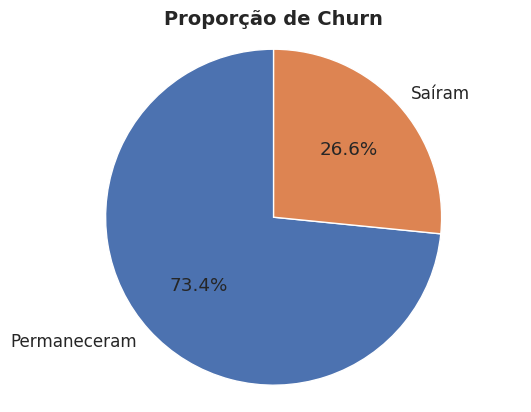

In [ ]:
# Distribui√ß√£o da Evas√£o
labels = ['Permaneceram', 'Sa√≠ram']
sizes = df_churn['churn_bin'].value_counts().sort_index()

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Propor√ß√£o de Churn', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()

Podemos observar que a maioria dos clientes presente no conjunto de dados permaneceram na empresa.

## An√°lise de Evas√£o por Vari√°veis Categ√≥ricas

In [ ]:
def plot_categorica_por_churn(coluna):
    plt.figure(figsize=(9, 5))
    ax = sns.countplot(data=df_churn, x=coluna, hue='churn_bin')
    plt.title(f'Distribui√ß√£o de Churn por {coluna.capitalize()}', loc='left', fontsize=14, fontweight='bold')
    plt.xlabel('')
    plt.ylabel('')
    plt.legend(title='Churn', labels=['Ficaram', 'Sa√≠ram'])
    plt.yticks([])

    total = len(df_churn)
    for p in ax.patches:
      height = p.get_height()
      if height == 0:
          continue  # Pula a barra invis√≠vel
      percentual = 100 * height / total
      ax.annotate(f'{percentual:.1f}%',
                  (p.get_x() + p.get_width() / 2., height),
                  ha='center', va='bottom', fontsize=10, fontweight='bold')

    plt.tight_layout()
    plt.savefig(f'/content/{col}.png', format='png', dpi=300)
    plt.show()

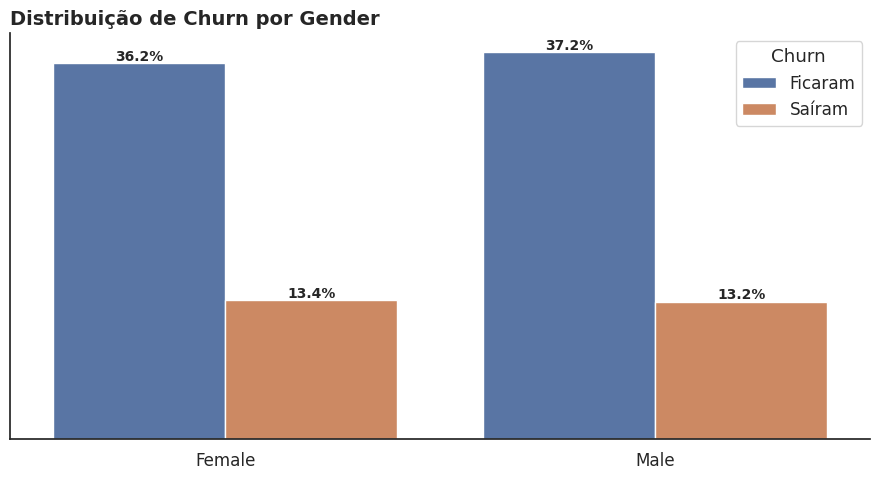

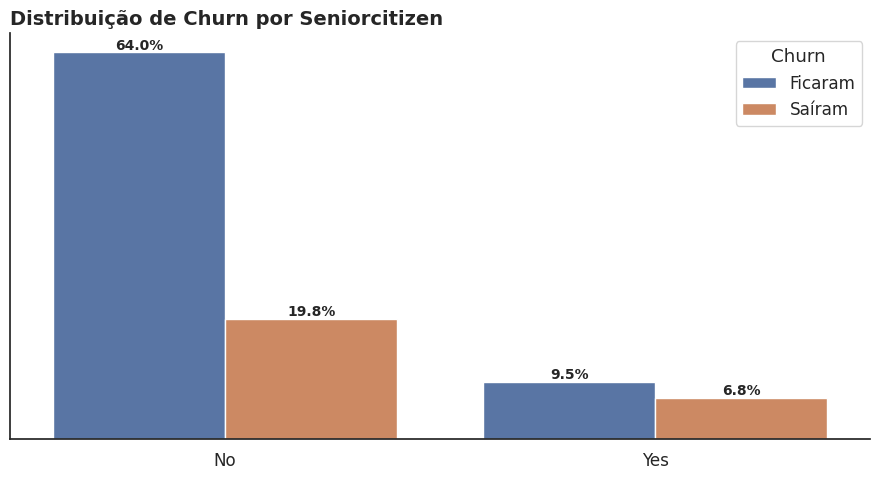

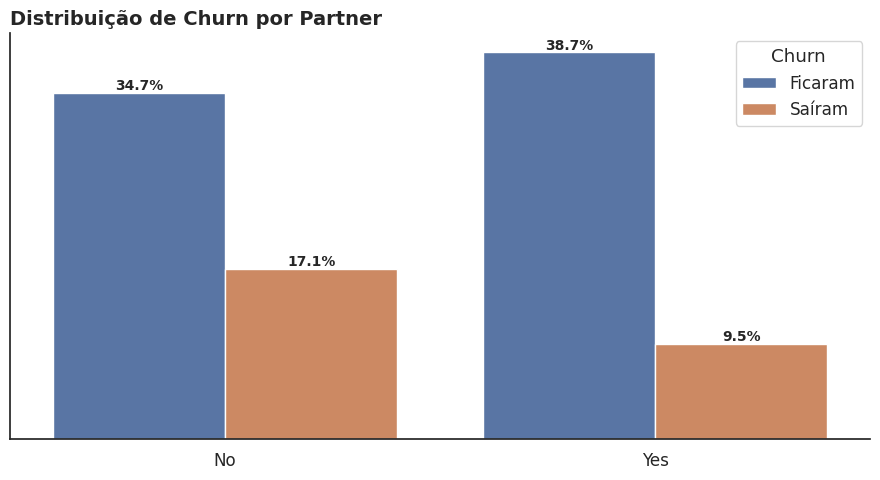

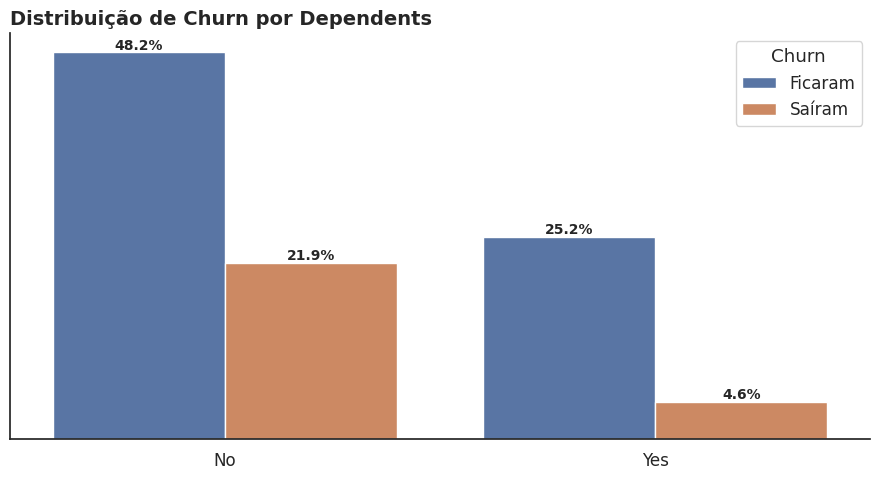

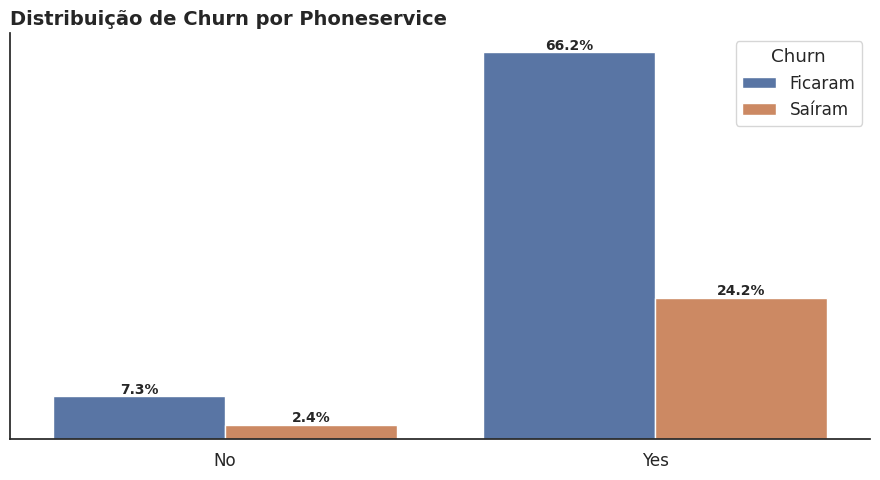

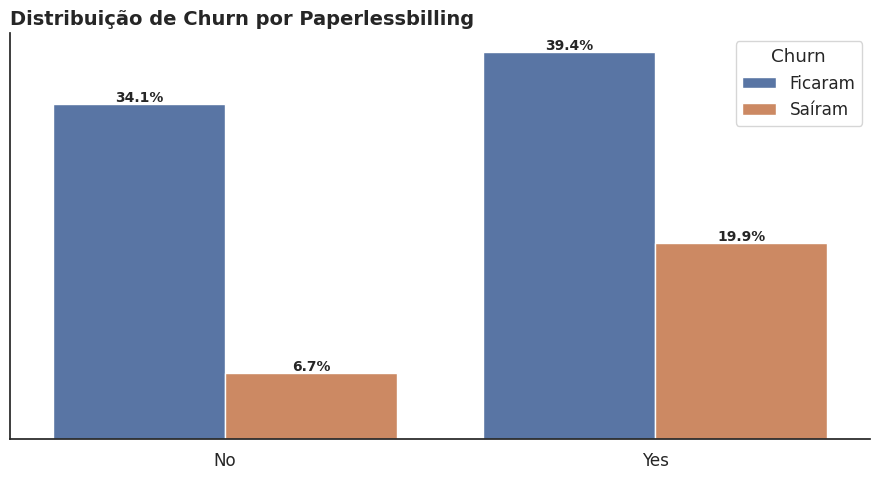

In [ ]:
variaveis_cat = ['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice','paperlessbilling']

for col in variaveis_cat:
    plot_categorica_por_churn(col)


In [ ]:
variaveis_multiclasse = ['multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
                         'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
                         'contract', 'paymentmethod']

for col in variaveis_multiclasse:
    resumo = (df_churn.groupby(col, observed=True)['churn_bin']
                      .mean()
                      .mul(100)
                      .round(1)
                      .reset_index()
                      .rename(columns={'churn_bin': 'churn_rate (%)'})
                  )
    display(resumo)
    print('\n\n')


multiplelines  churn_rate (%)
0                No            25.1
1  No phone service            25.0
2               Yes            28.6

internetservice  churn_rate (%)
0             DSL            19.0
1     Fiber optic            41.9
2              No             7.4

onlinesecurity  churn_rate (%)
0                   No            41.8
1  No internet service             7.4
2                  Yes            14.6

onlinebackup  churn_rate (%)
0                   No            39.9
1  No internet service             7.4
2                  Yes            21.6

deviceprotection  churn_rate (%)
0                   No            39.1
1  No internet service             7.4
2                  Yes            22.5

techsupport  churn_rate (%)
0                   No            41.6
1  No internet service             7.4
2                  Yes            15.2

streamingtv  churn_rate (%)
0                   No            33.5
1  No internet service             7.4
2                  Yes            30.1

streamingmovies  churn_rate (%)
0                   No            33.7
1  No internet service             7.4
2                  Yes            30.0

contract  churn_rate (%)
0  Month-to-month            42.7
1        One year            11.3
2        Two year             2.8

paymentmethod  churn_rate (%)
0  Bank transfer (automatic)            16.7
1    Credit card (automatic)            15.3
2           Electronic check            45.3
3               Mailed check            19.2

## An√°lise de Evas√£o por Vari√°veis Categ√≥ricas

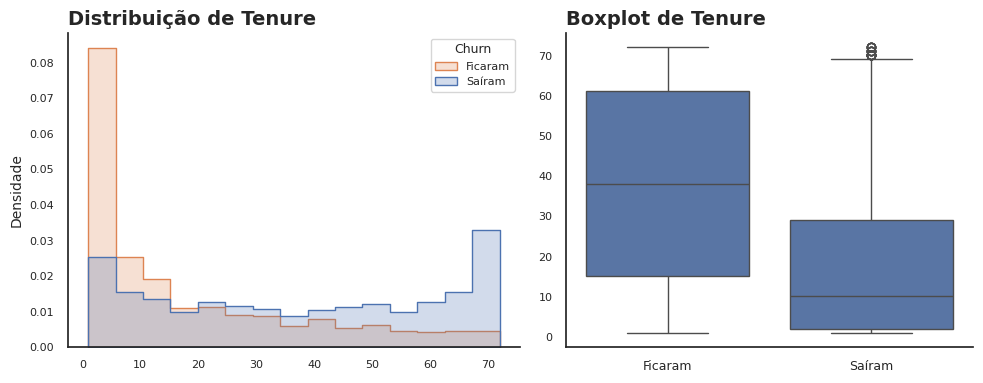

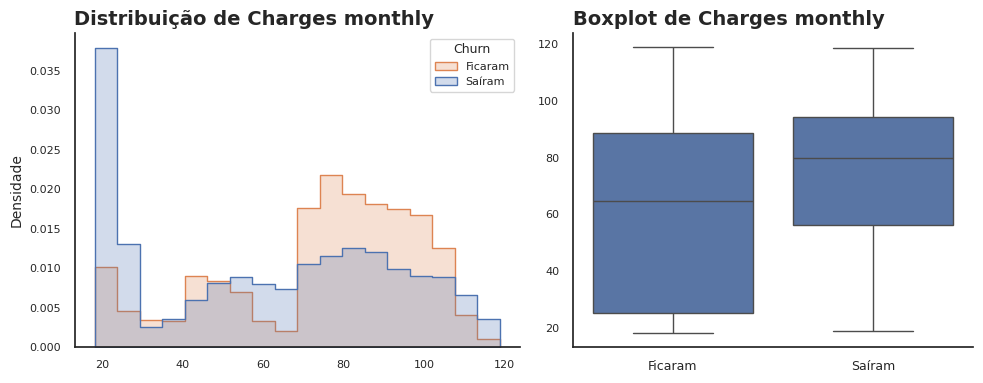

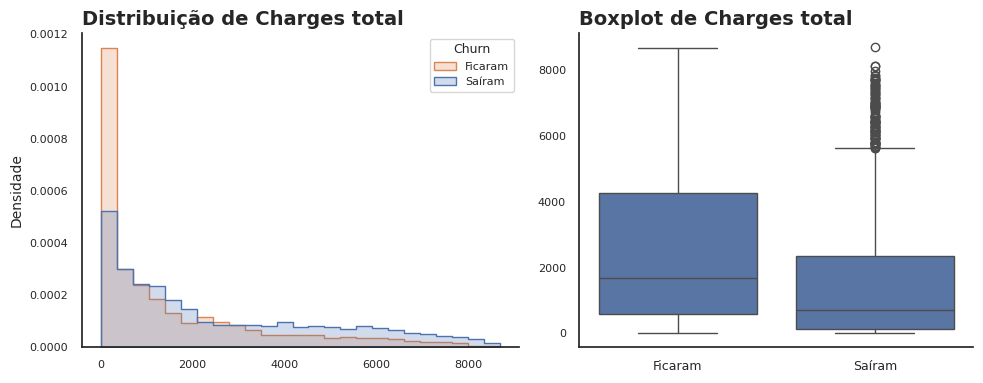

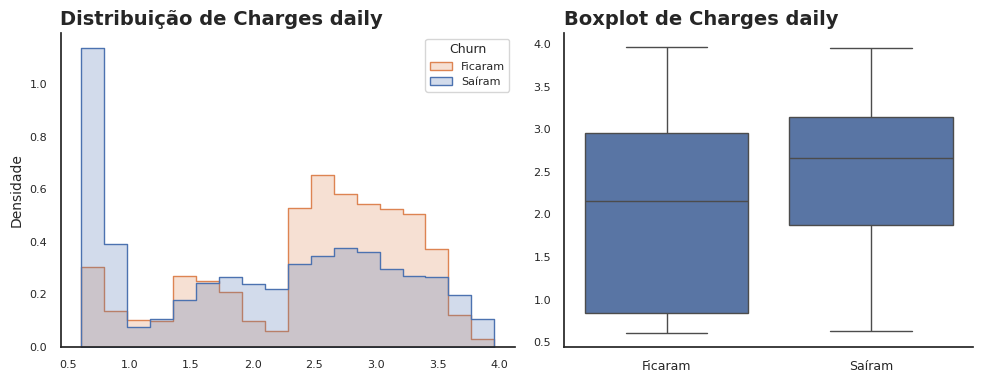

In [ ]:
def comparar_variavel_por_churn(coluna):
    fig, axes = plt.subplots(1, 2, figsize=(10, 4), gridspec_kw={'width_ratios': [1, 0.9]})

    # Histograma mais limpo
    sns.histplot(data=df_churn, x=coluna, hue='churn_bin', element='step',
                 stat='density', common_norm=False, ax=axes[0])
    axes[0].set_title(f'Distribui√ß√£o de {coluna.replace("_", " ").capitalize()}', loc='left', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('')
    axes[0].set_ylabel('Densidade', fontsize=10)
    axes[0].legend(title='Churn', labels=['Ficaram', 'Sa√≠ram'], fontsize=8, title_fontsize=9, loc='upper right')
    axes[0].tick_params(axis='x', labelsize=8)
    axes[0].tick_params(axis='y', labelsize=8)

    # Boxplot
    sns.boxplot(data=df_churn, x='churn_bin', y=coluna, ax=axes[1])
    axes[1].set_title(f'Boxplot de {coluna.replace("_", " ").capitalize()}', loc='left', fontsize=14, fontweight='bold')
    axes[1].set_xticks([0, 1])
    axes[1].set_xticklabels(['Ficaram', 'Sa√≠ram'], fontsize=9)
    axes[1].set_xlabel('')
    axes[1].set_ylabel('')
    axes[1].tick_params(axis='y', labelsize=8)

    plt.tight_layout(pad=1)
    plt.show()



variaveis_numericas = ['tenure', 'charges_monthly', 'charges_total', 'charges_daily']

for col in variaveis_numericas:
    comparar_variavel_por_churn(col)

#üßæ Relat√≥rio Final: An√°lise de Evas√£o de Clientes


## 1. Introdu√ß√£o

O objetivo principal deste estudo √© aprofundar o entendimento da an√°lise de churn, ou seja, da evas√£o de clientes, em uma base de dados do setor de telecomunica√ß√µes. Por meio de uma An√°lise Explorat√≥ria de Dados (EDA), buscamos identificar os principais padr√µes e fatores que influenciam a decis√£o de cancelamento.

Ser√£o examinadas diversas vari√°veis, incluindo o perfil demogr√°fico dos clientes, a composi√ß√£o dos servi√ßos contratados e o hist√≥rico de pagamentos. Os insights gerados por essa an√°lise s√£o cruciais para a elabora√ß√£o de estrat√©gias de reten√ß√£o mais assertivas, contribuindo diretamente para a minimiza√ß√£o de perdas financeiras e para a sustentabilidade do neg√≥cio.

## 2. Limpeza e Tratamento do Dados

Para a prepara√ß√£o dos dados, as linhas com valores ausentes foram inicialmente removidas, garantindo a consist√™ncia da an√°lise. Em seguida, as vari√°veis bin√°rias com respostas 'Yes'/'No' foram padronizadas para manter uniformidade na interpreta√ß√£o.

A coluna que indicava se o cliente tinha 65 anos ou mais tamb√©m foi ajustada para seguir o mesmo padr√£o de 'Yes' e 'No', facilitando a leitura e a an√°lise posterior. A vari√°vel-alvo que representa a evas√£o de clientes foi convertida para um formato bin√°rio, utilizando 0 para indicar clientes que permaneceram e 1 para os que cancelaram o servi√ßo.

Por fim, as caracteristicas dos clientes foram classificadas em dois grandes grupos: vari√°veis num√©ricas e vari√°veis categ√≥ricas, que seram exploradas nas etapas seguintes da an√°lise.

## 3. An√°lise Explorat√≥ria de Dados

Para iniciar a investiga√ß√£o, utilizamos a An√°lise Explorat√≥ria de Dados. Essa metodologia nos permitiu uma primeira visualiza√ß√£o do conjunto de dados, o que foi fundamental para entender a distribui√ß√£o das vari√°veis e identificar padr√µes que podem influenciar a evas√£o de clientes (churn). Os gr√°ficos e as estat√≠sticas geradas nesta se√ß√£o oferecem um panorama detalhado que orientar√° as pr√≥ximas etapas do estudo.

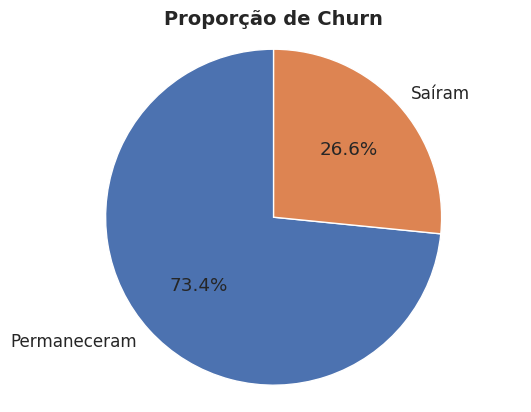

In [ ]:
# @title ## 3.1 Distribui√ß√£o da Evas√£o

# Distribui√ß√£o da Evas√£o
labels = ['Permaneceram', 'Sa√≠ram']
sizes = df_churn['churn_bin'].value_counts().sort_index()

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Propor√ß√£o de Churn', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()

A an√°lise da distribui√ß√£o de evas√£o revela que aproximadamente 26,6% dos clientes cancelaram o servi√ßo, enquanto 73,4% permaneceram ativos. Essa distribui√ß√£o √© visualmente representada no gr√°fico acima. Embora a maioria dos clientes tenha sido retida, a taxa de churn de 26,6% √© significativa e indica a necessidade de aten√ß√£o. Esse percentual sugere que, a cada quatro clientes, aproximadamente um est√° optando por encerrar o v√≠nculo com a empresa, o que pode representar impacto financeiro consider√°vel, especialmente em mercados altamente competitivos como de telecomunica√ß√µes. Esa m√©trica serve como refer√™ncia para todas as demais an√°lises do estudo, que buscam identificar os fatores que mais influenciam esse comportamento de evas√£o e orientar estrat√©gias para sua redu√ß√£o.


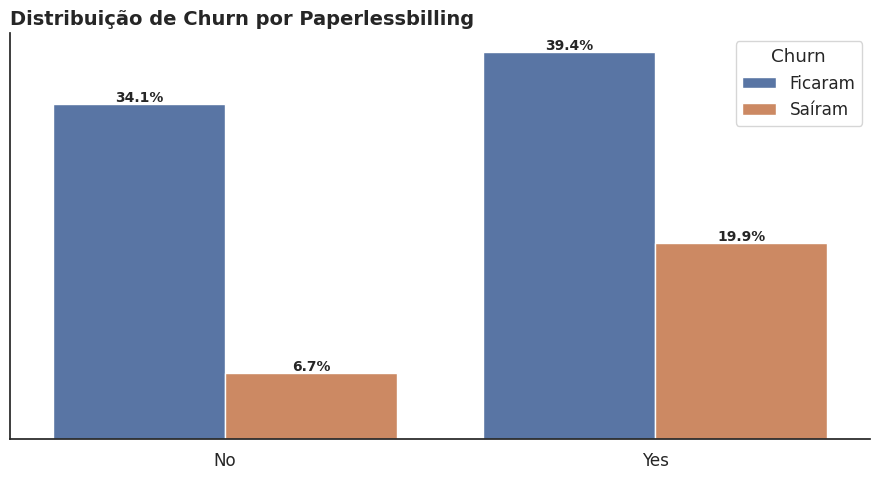

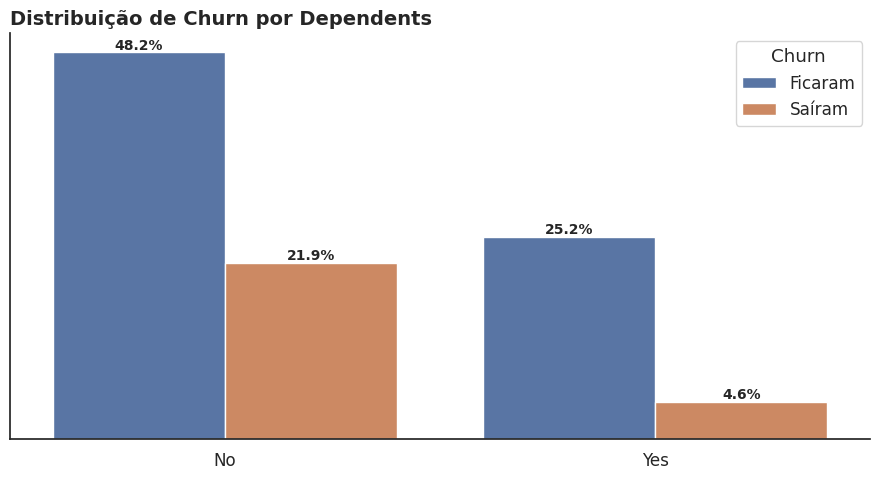

In [ ]:
# @title 3.2 Rela√ß√£o variaveis sociais com a Evas√£o de clientes
plot_categorica_por_churn('paperlessbilling')
plot_categorica_por_churn('dependents')

As analises das variaveis revelam que clientes que optam por fatura digital apresentaram uma taxa de evas√£o significativamente maior (19,9%) do que os que recebem fatura em papel (6,7%), sugerindo que **o modelo digital pode n√£o estar sendo bem compreendido ou aceito por parte dos clientes**. Seria importante para a empresa a revis√£o na comunica√ß√£o ou formato de entrega.

Observa-se, tamb√©m,  uma elevada taxa de evas√£o entre clientes sem dependentes (21,9%), enquanto apenas 4,6% dos clientes com dependentes cancelaram o servi√ßo. Isso pode **indicar que o perfil familiar pode estar associado a maior fidelidade e pode ser utilizado como crit√©rio em campanhas de reten√ß√£o**. Observem os gr√°ficos abaixo:

In [ ]:
# @title 3.3 An√°lise da Rela√ß√£o entre Servi√ßos Digitais e o Churn de Clientes
servicos_digitais = ['internetservice', 'onlinesecurity', 'techsupport']

for col in servicos_digitais:
    resumo = (df_churn.groupby(col, observed=True)['churn_bin']
                      .mean()
                      .mul(100)
                      .round(1)
                      .reset_index()
                      .rename(columns={'churn_bin': 'churn_rate (%)'})
                  )
    display(resumo)
    print('\n\n')

internetservice  churn_rate (%)
0             DSL            19.0
1     Fiber optic            41.9
2              No             7.4

onlinesecurity  churn_rate (%)
0                   No            41.8
1  No internet service             7.4
2                  Yes            14.6

techsupport  churn_rate (%)
0                   No            41.6
1  No internet service             7.4
2                  Yes            15.2

A an√°lise dos servi√ßos digitais contratados pelos clientes revela correla√ß√µes importantes com a taxa de churn. Clientes que n√£o possuem servi√ßo de internet apresentam a menor taxa de evas√£o (7,4%), indicando uma base mais est√°vel, embora esse grupo provavelmente represente uma parcela menor dos consumidores.

Entre os que possuem internet, usu√°rios de fibra √≥ptica demonstram maior propens√£o a evas√£o (41,9%), contrastando com os usu√°rios de DSL, cuja taxa √© de 19%. Esse comportamento pode estar relacionado a diferentes perfis de consumo ou expectativas de qualidade associadas ao servi√ßo de fibra.

Al√©m disso, observa-se que a falta de servi√ßos adicionais, como seguran√ßa online e suporte t√©cnico, est√° associada a altas taxas de cancelamento (41,8% e 41,6%, respectivamente). Por outro lado, clientes que contratam essas funcionalidades apresentam taxas significativamente menores de evas√£o: 14,6% para seguran√ßa online e 15,2% para suporte t√©cnico.

Esses dados sugerem que a ades√£o a servi√ßos complementares pode ter efeito positivo na fideliza√ß√£o, indicando uma oportunidade estrat√©gica de incentivo a esses produtos como forma de mitigar cancelamentos.

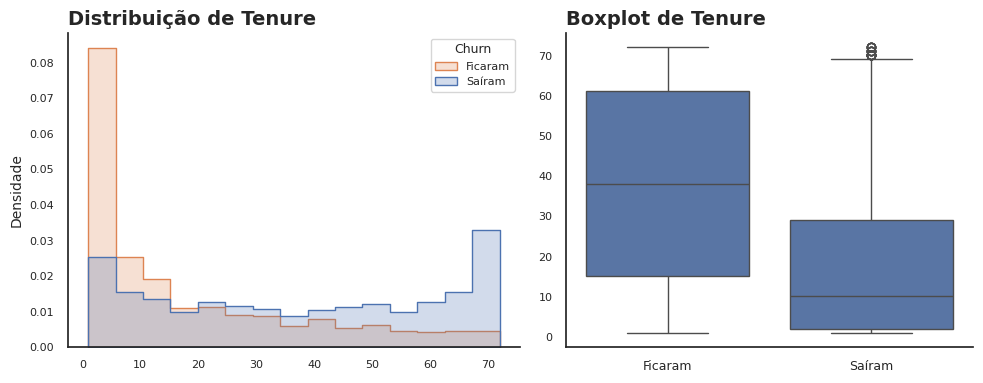

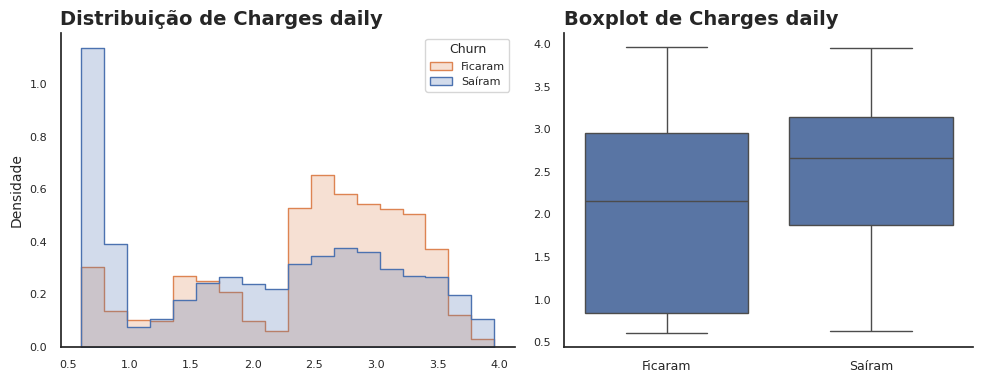

In [ ]:
# @title 3.4 An√°lise de Vari√°veis Num√©ricas
comparar_variavel_por_churn('tenure')
comparar_variavel_por_churn('charges_daily')


A an√°lise dos meses de contrato do cliente revela um padr√£o bastante consistente: clientes que permaneceram na empresa tendem a ter um tempo de v√≠nculo significativamente maior, com mediana pr√≥xima a 38 meses. Por outro lado, clientes que cancelaram seus contratos apresentam, em sua maioria, tempo de contrato muito baixos, concentrando-se nos primeiros meses de relacionamento. Essa distribui√ß√£o indica que o **risco de evas√£o √© particularmente elevado nos est√°gios iniciais do ciclo de contrato do cliente**. Estrat√©gias de reten√ß√£o voltadas para os primeiros meses de contrato podem, portanto, ter alto impacto na redu√ß√£o do churn.

A vari√°vel criada para representar uma m√©dia aproximada de gasto di√°rio, tamb√©m apresentou um comportamento relevante. Clientes que cancelaram o servi√ßo possuem uma mediana de gasto di√°rio ligeiramente superior √†queles que permaneceram, sugerindo que **clientes com custos mais elevados podem estar mais propensos √† evas√£o**. Essa informa√ß√£o pode indicar uma **sensibilidade ao pre√ßo ou √† percep√ß√£o de custo-benef√≠cio dos servi√ßos prestados**. Avaliar a estrutura tarif√°ria e os benef√≠cios percebidos por clientes de maior gasto pode ser uma via estrat√©gica para reduzir o churn nesse segmento.

# 4. Conclus√£o

A an√°lise explorat√≥ria da base de dados de telecomunica√ß√µes revelou insights cruciais sobre a evas√£o de clientes (churn). O estudo demonstrou que a **taxa de cancelamento atinge 26,6%**, um √≠ndice que ressalta a urg√™ncia em implementar estrat√©gias de reten√ß√£o.

Dentre os principais fatores identificados, o tempo de perman√™ncia se mostrou um indicador cr√≠tico, com taxas de evas√£o significativamente mais altas entre os clientes de menor tempo de contrato. Isso sugere que o **in√≠cio do relacionamento √© um per√≠odo-chave para a fideliza√ß√£o**. Al√©m disso, o perfil de gasto tamb√©m se mostrou relevante, pois **clientes com maior gasto di√°rio apresentaram uma maior propens√£o √† evas√£o**, o que pode estar associado a uma percep√ß√£o negativa do custo-benef√≠cio.

Observou-se, ainda, que a contrata√ß√£o de **servi√ßos adicionais e a tecnologia de internet s√£o diferenciais importantes**. Clientes que n√£o aderiram a servi√ßos extras, como suporte t√©cnico ou seguran√ßa online, e aqueles que utilizam internet de fibra √≥ptica, demonstraram maior tend√™ncia ao churn. Por fim, fatores demogr√°ficos e comportamentais, como clientes sem dependentes, sem parceiros e que optam por faturas eletr√¥nicas, foram associados a uma maior probabilidade de evas√£o.

Esses resultados sublinham a necessidade de uma abordagem estrat√©gica e segmentada na reten√ß√£o de clientes, com foco em a√ß√µes direcionadas aos novos usu√°rios, na oferta de pacotes de servi√ßos complementares e na revis√£o de pol√≠ticas de precifica√ß√£o. A compreens√£o desses padr√µes √© fundamental para otimizar os esfor√ßos de reten√ß√£o e mitigar as perdas futuras.

In [ ]:
# Extrair os dados para a pr√≥xima etapa

df_churn.to_csv('df_churn.csv', index=False)